In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger_eng')
nltk.download("wordnet")
nltk.download("punkt_tab")
nltk.download("stopwords")

STOPWORDS = set(stopwords.words("english"))
NEGATIONS = {"not", "no", "nor", "n't", "never", "hardly", "barely"}
STOPWORDS = STOPWORDS - NEGATIONS

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\dawid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dawid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dawid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dawid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# initialize paths for data
all_beauty_path = "../data/raw/All_Beauty.jsonl"
handmade_path = "../data/raw/Handmade_Products.jsonl"
health_care_path = "../data/raw/Health_and_Personal_Care.jsonl"

In [8]:
all_beauty_df = pd.read_json(all_beauty_path, lines=True)
handmade_df = pd.read_json(handmade_path, lines=True)
health_care_df = pd.read_json(health_care_path, lines=True)

# ------------- Cleaning -------------

### 1. Reduce data and equlize rating distribution

In [9]:
all_beauty_df = (
    all_beauty_df
    .groupby("rating", group_keys=False)
    .apply(
        lambda x: x.sample(n=8_000, random_state=42)
    )
)

C:\Users\dawid\AppData\Local\Temp\ipykernel_3952\3662069472.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


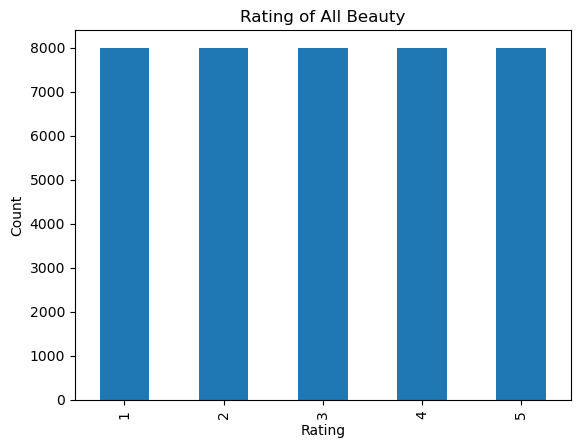

In [10]:
all_beauty_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of All Beauty")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [11]:
handmade_df = (
    handmade_df
    .groupby("rating", group_keys=False)
    .apply(
        lambda x: x.sample(n=8_000, random_state=42),
    )
)

C:\Users\dawid\AppData\Local\Temp\ipykernel_3952\3657374568.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


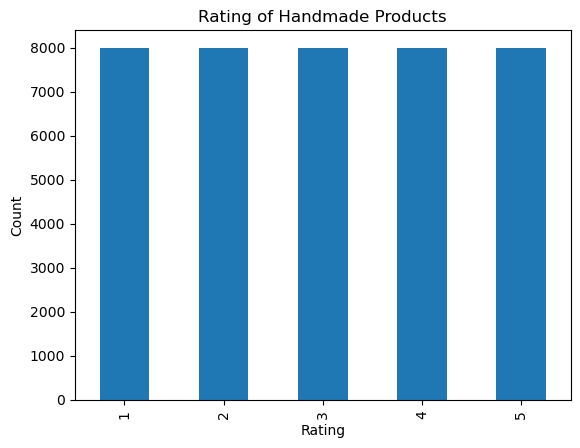

In [12]:
handmade_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of Handmade Products")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [13]:
health_care_df = (
    health_care_df
    .groupby("rating", group_keys=False)
    .apply(
        lambda x: x.sample(n=8_000, random_state=42),
    )
)

C:\Users\dawid\AppData\Local\Temp\ipykernel_3952\1133288733.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


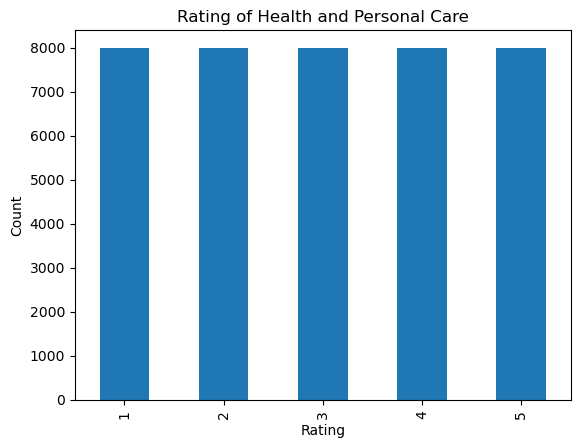

In [14]:
health_care_df["rating"].value_counts().plot(kind="bar")
plt.title("Rating of Health and Personal Care")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 2. Delete all reviews with NO verified purchases

In [15]:
all_beauty_df = all_beauty_df[all_beauty_df["verified_purchase"] == True].copy()
all_beauty_df["verified_purchase"].value_counts()

verified_purchase
True    36221
Name: count, dtype: int64

In [16]:
handmade_df = handmade_df[handmade_df["verified_purchase"] == True].copy()
handmade_df["verified_purchase"].value_counts()

verified_purchase
True    37859
Name: count, dtype: int64

In [17]:
health_care_df = health_care_df[health_care_df["verified_purchase"] == True].copy()
health_care_df["verified_purchase"].value_counts()

verified_purchase
True    35828
Name: count, dtype: int64

### 3. Delete all reviews with text length < 10

In [18]:
all_beauty_df = all_beauty_df[all_beauty_df["text"].str.len() > 10].copy()
all_beauty_df.shape

(34964, 10)

In [19]:
handmade_df = handmade_df[handmade_df["text"].str.len() > 10].copy()
handmade_df.shape

(36712, 10)

In [20]:
health_care_df = health_care_df[health_care_df["text"].str.len() > 10].copy()
health_care_df.shape

(34613, 10)

### 4. Delete all unnecessary columns, the only left are: rating, title and text

In [21]:
del all_beauty_df["images"]
del all_beauty_df["asin"]
del all_beauty_df["parent_asin"]
del all_beauty_df["user_id"]
del all_beauty_df["timestamp"]
del all_beauty_df["helpful_vote"]
del all_beauty_df["verified_purchase"]
all_beauty_df.head()

,rating,title,text
294337,1,Didn't last,Followed the instructions on how to apply the ...
39480,1,Not a L curl,They were not a L curl
145465,1,They do not last long!,These did not last very long at all. May be go...
651036,1,Disappointing,So very disappointing huge bottle but the sham...
93072,1,Worst eyelashes,These eyelashes are so ugly..way too curly and...


In [22]:
del handmade_df["images"]
del handmade_df["asin"]
del handmade_df["parent_asin"]
del handmade_df["user_id"]
del handmade_df["timestamp"]
del handmade_df["helpful_vote"]
del handmade_df["verified_purchase"]
handmade_df.head()

,rating,title,text
192646,1,Not authentic sea glass,this was a broken beer bottle stuck into a roc...
383166,1,Rainey,There’s no scent coming off of ot
135014,1,Fades away,This smelled good for about 5 minutes then com...
50817,1,Really tiny for almost 40 dollars,"The pillow is cute. But seriously so small, r..."
5640,1,Cloth babies diaper!?,This was purchased as a gift. The quality is n...


In [23]:
del health_care_df["images"]
del health_care_df["asin"]
del health_care_df["parent_asin"]
del health_care_df["user_id"]
del health_care_df["timestamp"]
del health_care_df["helpful_vote"]
del health_care_df["verified_purchase"]
health_care_df.head()

,rating,title,text
393116,1,One Star,There rubber and are completely different the ...
390357,1,Flimsy,Flimsy and has a difficult time turning when p...
188497,1,When I say the handle is to short it's about ...,When I say the handle is to short it's about 1...
11909,1,I already have brittle hair and this only made...,This spray caused my hair to become brittle. I...
462374,1,Not working after a few months,Received product in early December and tested ...


# ------------- Preprocessing -------------

### 1. Combining title and text

In [24]:
all_beauty_df['text_combined'] = all_beauty_df['title'].fillna('') + ' ' + all_beauty_df['text'].fillna('')
del all_beauty_df["title"]
del all_beauty_df["text"]
all_beauty_df.head()

,rating,text_combined
294337,1,Didn't last Followed the instructions on how t...
39480,1,Not a L curl They were not a L curl
145465,1,They do not last long! These did not last very...
651036,1,Disappointing So very disappointing huge bottl...
93072,1,Worst eyelashes These eyelashes are so ugly..w...


In [25]:
handmade_df['text_combined'] = handmade_df['title'].fillna('') + ' ' + handmade_df['text'].fillna('')
del handmade_df["title"]
del handmade_df["text"]
handmade_df.head()

,rating,text_combined
192646,1,Not authentic sea glass this was a broken beer...
383166,1,Rainey There’s no scent coming off of ot
135014,1,Fades away This smelled good for about 5 minut...
50817,1,Really tiny for almost 40 dollars The pillow i...
5640,1,Cloth babies diaper!? This was purchased as a ...


In [26]:
health_care_df['text_combined'] = health_care_df['title'].fillna('') + ' ' + health_care_df['text'].fillna('')
del health_care_df["title"]
del health_care_df["text"]
health_care_df.head()

,rating,text_combined
393116,1,One Star There rubber and are completely diffe...
390357,1,Flimsy Flimsy and has a difficult time turning...
188497,1,When I say the handle is to short it's about ....
11909,1,I already have brittle hair and this only made...
462374,1,Not working after a few months Received produc...


### 2. Lowercasing

In [27]:
all_beauty_df["text_combined"] = all_beauty_df["text_combined"].str.lower()
all_beauty_df.head()

,rating,text_combined
294337,1,didn't last followed the instructions on how t...
39480,1,not a l curl they were not a l curl
145465,1,they do not last long! these did not last very...
651036,1,disappointing so very disappointing huge bottl...
93072,1,worst eyelashes these eyelashes are so ugly..w...


In [28]:
handmade_df["text_combined"] = handmade_df["text_combined"].str.lower()
handmade_df.head()

,rating,text_combined
192646,1,not authentic sea glass this was a broken beer...
383166,1,rainey there’s no scent coming off of ot
135014,1,fades away this smelled good for about 5 minut...
50817,1,really tiny for almost 40 dollars the pillow i...
5640,1,cloth babies diaper!? this was purchased as a ...


In [29]:
health_care_df["text_combined"] = health_care_df["text_combined"].str.lower()
health_care_df.head()

,rating,text_combined
393116,1,one star there rubber and are completely diffe...
390357,1,flimsy flimsy and has a difficult time turning...
188497,1,when i say the handle is to short it's about ....
11909,1,i already have brittle hair and this only made...
462374,1,not working after a few months received produc...


### 3. Tokenization

In [30]:
all_beauty_df["text_combined"] = all_beauty_df["text_combined"].apply(nltk.word_tokenize)
all_beauty_df["text_combined"].apply(type).value_counts()

text_combined
<class 'list'>    34964
Name: count, dtype: int64

In [31]:
handmade_df["text_combined"] = handmade_df["text_combined"].apply(nltk.word_tokenize)
handmade_df["text_combined"].apply(type).value_counts()

text_combined
<class 'list'>    36712
Name: count, dtype: int64

In [32]:
health_care_df["text_combined"] = health_care_df["text_combined"].apply(nltk.word_tokenize)
health_care_df["text_combined"].apply(type).value_counts()

text_combined
<class 'list'>    34613
Name: count, dtype: int64

### 4. Removing stopwords and punctuation

In [33]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [34]:
# inserted into a new column to compare BEFORE and AFTER
all_beauty_df["text_stopwords"] = all_beauty_df["text_combined"].apply(
    lambda tokens: [t for t in tokens if t not in STOPWORDS and t not in string.punctuation]
) 

pd.set_option("display.max_colwidth", 200)
all_beauty_df.head()

,rating,text_combined,text_stopwords
294337,1,"[did, n't, last, followed, the, instructions, on, how, to, apply, the, screen, protector, and, it, fell, off, within, a, week, .]","[n't, last, followed, instructions, apply, screen, protector, fell, within, week]"
39480,1,"[not, a, l, curl, they, were, not, a, l, curl]","[not, l, curl, not, l, curl]"
145465,1,"[they, do, not, last, long, !, these, did, not, last, very, long, at, all, ., may, be, good, for, a, night, out, ,, but, that, ’, s, about, it, .]","[not, last, long, not, last, long, may, good, night, ’]"
651036,1,"[disappointing, so, very, disappointing, huge, bottle, but, the, shampoo, is, nothing, but, water, .]","[disappointing, disappointing, huge, bottle, shampoo, nothing, water]"
93072,1,"[worst, eyelashes, these, eyelashes, are, so, ugly, .., way, too, curly, and, long, ., it, looks, ridiculous, ., would, not, recommend, these, at, all, .]","[worst, eyelashes, eyelashes, ugly, .., way, curly, long, looks, ridiculous, would, not, recommend]"


In [35]:
handmade_df["text_stopwords"] = handmade_df["text_combined"].apply(
    lambda tokens: [t for t in tokens if t not in STOPWORDS and t not in string.punctuation]
)

handmade_df.head()

,rating,text_combined,text_stopwords
192646,1,"[not, authentic, sea, glass, this, was, a, broken, beer, bottle, stuck, into, a, rock, tumbler]","[not, authentic, sea, glass, broken, beer, bottle, stuck, rock, tumbler]"
383166,1,"[rainey, there, ’, s, no, scent, coming, off, of, ot]","[rainey, ’, no, scent, coming, ot]"
135014,1,"[fades, away, this, smelled, good, for, about, 5, minutes, then, completely, faded, away, ., sigh, .]","[fades, away, smelled, good, 5, minutes, completely, faded, away, sigh]"
50817,1,"[really, tiny, for, almost, 40, dollars, the, pillow, is, cute, ., but, seriously, so, small, ,, really, disappointed, for, 35, dollars, ., i, could, go, to, tjmax, and, buy, 4]","[really, tiny, almost, 40, dollars, pillow, cute, seriously, small, really, disappointed, 35, dollars, could, go, tjmax, buy, 4]"
5640,1,"[cloth, babies, diaper, !, ?, this, was, purchased, as, a, gift, ., the, quality, is, not, what, you, would, expect, for, the, price, paid, !, raw, edges, ,, cloth, diaper, material, ., i, highly,...","[cloth, babies, diaper, purchased, gift, quality, not, would, expect, price, paid, raw, edges, cloth, diaper, material, highly, doubt, hold, laundry, look, like, something, china, pass, one, people]"


In [36]:
health_care_df["text_stopwords"] = health_care_df["text_combined"].apply(
    lambda tokens: [t for t in tokens if t not in STOPWORDS and t not in string.punctuation]
)

health_care_df.head()

,rating,text_combined,text_stopwords
393116,1,"[one, star, there, rubber, and, are, completely, different, the, what, ’, s, described]","[one, star, rubber, completely, different, ’, described]"
390357,1,"[flimsy, flimsy, and, has, a, difficult, time, turning, when, pushing, the, center, button, ., if, you, ’, re, reading, this, ,, i, would, try, a, different, case]","[flimsy, flimsy, difficult, time, turning, pushing, center, button, ’, reading, would, try, different, case]"
188497,1,"[when, i, say, the, handle, is, to, short, it, 's, about, ..., when, i, say, the, handle, is, to, short, it, 's, about, 10, inches, in, length, pluss, 4in, scruber, <, br, /, >, i, 'm, 6, ', 2, &,...","[say, handle, short, 's, ..., say, handle, short, 's, 10, inches, length, pluss, 4in, scruber, br, 'm, 6, 2, 34, got, reach, alot, big, people, n't, buy]"
11909,1,"[i, already, have, brittle, hair, and, this, only, made, it, worse, ., missed, the, deadline, to, return, it, this, spray, caused, my, hair, to, become, brittle, ., i, already, have, brittle, hair...","[already, brittle, hair, made, worse, missed, deadline, return, spray, caused, hair, become, brittle, already, brittle, hair, made, worse, missed, deadline, return, hence, lousy, review, ...]"
462374,1,"[not, working, after, a, few, months, received, product, in, early, december, and, tested, while, feeling, well, ., seemed, to, be, mostly, accurate, although, inconsistent, ,, but, performed, bet...","[not, working, months, received, product, early, december, tested, feeling, well, seemed, mostly, accurate, although, inconsistent, performed, better, made, sure, pre-warm, sensor, holding, skin, ..."


### 5. Removing emojis

In [37]:
import re

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags
    "]+",
    flags=re.UNICODE
)

def remove_emojis_from_list(token_list):
    if isinstance(token_list, list):
        return [emoji_pattern.sub("", token) for token in token_list]
    return token_list

In [38]:
all_beauty_df['text_stopwords'] = all_beauty_df['text_stopwords'].apply(remove_emojis_from_list)

In [39]:
handmade_df['text_stopwords'] = handmade_df['text_stopwords'].apply(remove_emojis_from_list)

In [40]:
health_care_df['text_stopwords'] = health_care_df['text_stopwords'].apply(remove_emojis_from_list)

### 6. Lemmatization + POS-Tagging

In [41]:
lemmatizer = WordNetLemmatizer()

In [42]:
# pass word-type in WordNetLemmatizer-Format
def get_wordnet_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [43]:
# lemmatize with a specific word-type
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    return [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
    ]

In [44]:
all_beauty_df["lemmatized"] = all_beauty_df["text_stopwords"].apply(lemmatize_tokens)
all_beauty_df.head()

,rating,text_combined,text_stopwords,lemmatized
294337,1,"[did, n't, last, followed, the, instructions, on, how, to, apply, the, screen, protector, and, it, fell, off, within, a, week, .]","[n't, last, followed, instructions, apply, screen, protector, fell, within, week]","[n't, last, followed, instruction, apply, screen, protector, fell, within, week]"
39480,1,"[not, a, l, curl, they, were, not, a, l, curl]","[not, l, curl, not, l, curl]","[not, l, curl, not, l, curl]"
145465,1,"[they, do, not, last, long, !, these, did, not, last, very, long, at, all, ., may, be, good, for, a, night, out, ,, but, that, ’, s, about, it, .]","[not, last, long, not, last, long, may, good, night, ’]","[not, last, long, not, last, long, may, good, night, ’]"
651036,1,"[disappointing, so, very, disappointing, huge, bottle, but, the, shampoo, is, nothing, but, water, .]","[disappointing, disappointing, huge, bottle, shampoo, nothing, water]","[disappoint, disappointing, huge, bottle, shampoo, nothing, water]"
93072,1,"[worst, eyelashes, these, eyelashes, are, so, ugly, .., way, too, curly, and, long, ., it, looks, ridiculous, ., would, not, recommend, these, at, all, .]","[worst, eyelashes, eyelashes, ugly, .., way, curly, long, looks, ridiculous, would, not, recommend]","[bad, eyelash, eyelashes, ugly, .., way, curly, long, look, ridiculous, would, not, recommend]"


In [45]:
handmade_df["lemmatized"] = handmade_df["text_stopwords"].apply(lemmatize_tokens)
handmade_df.head()

,rating,text_combined,text_stopwords,lemmatized
192646,1,"[not, authentic, sea, glass, this, was, a, broken, beer, bottle, stuck, into, a, rock, tumbler]","[not, authentic, sea, glass, broken, beer, bottle, stuck, rock, tumbler]","[not, authentic, sea, glass, break, beer, bottle, stick, rock, tumbler]"
383166,1,"[rainey, there, ’, s, no, scent, coming, off, of, ot]","[rainey, ’, no, scent, coming, ot]","[rainey, ’, no, scent, come, ot]"
135014,1,"[fades, away, this, smelled, good, for, about, 5, minutes, then, completely, faded, away, ., sigh, .]","[fades, away, smelled, good, 5, minutes, completely, faded, away, sigh]","[fade, away, smell, good, 5, minute, completely, fade, away, sigh]"
50817,1,"[really, tiny, for, almost, 40, dollars, the, pillow, is, cute, ., but, seriously, so, small, ,, really, disappointed, for, 35, dollars, ., i, could, go, to, tjmax, and, buy, 4]","[really, tiny, almost, 40, dollars, pillow, cute, seriously, small, really, disappointed, 35, dollars, could, go, tjmax, buy, 4]","[really, tiny, almost, 40, dollar, pillow, cute, seriously, small, really, disappointed, 35, dollar, could, go, tjmax, buy, 4]"
5640,1,"[cloth, babies, diaper, !, ?, this, was, purchased, as, a, gift, ., the, quality, is, not, what, you, would, expect, for, the, price, paid, !, raw, edges, ,, cloth, diaper, material, ., i, highly,...","[cloth, babies, diaper, purchased, gift, quality, not, would, expect, price, paid, raw, edges, cloth, diaper, material, highly, doubt, hold, laundry, look, like, something, china, pass, one, people]","[cloth, baby, diaper, purchase, gift, quality, not, would, expect, price, pay, raw, edge, cloth, diaper, material, highly, doubt, hold, laundry, look, like, something, china, pas, one, people]"


In [46]:
health_care_df["lemmatized"] = health_care_df["text_stopwords"].apply(lemmatize_tokens)
health_care_df.head()

,rating,text_combined,text_stopwords,lemmatized
393116,1,"[one, star, there, rubber, and, are, completely, different, the, what, ’, s, described]","[one, star, rubber, completely, different, ’, described]","[one, star, rubber, completely, different, ’, describe]"
390357,1,"[flimsy, flimsy, and, has, a, difficult, time, turning, when, pushing, the, center, button, ., if, you, ’, re, reading, this, ,, i, would, try, a, different, case]","[flimsy, flimsy, difficult, time, turning, pushing, center, button, ’, reading, would, try, different, case]","[flimsy, flimsy, difficult, time, turn, push, center, button, ’, read, would, try, different, case]"
188497,1,"[when, i, say, the, handle, is, to, short, it, 's, about, ..., when, i, say, the, handle, is, to, short, it, 's, about, 10, inches, in, length, pluss, 4in, scruber, <, br, /, >, i, 'm, 6, ', 2, &,...","[say, handle, short, 's, ..., say, handle, short, 's, 10, inches, length, pluss, 4in, scruber, br, 'm, 6, 2, 34, got, reach, alot, big, people, n't, buy]","[say, handle, short, 's, ..., say, handle, short, 's, 10, inch, length, pluss, 4in, scruber, br, 'm, 6, 2, 34, get, reach, alot, big, people, n't, buy]"
11909,1,"[i, already, have, brittle, hair, and, this, only, made, it, worse, ., missed, the, deadline, to, return, it, this, spray, caused, my, hair, to, become, brittle, ., i, already, have, brittle, hair...","[already, brittle, hair, made, worse, missed, deadline, return, spray, caused, hair, become, brittle, already, brittle, hair, made, worse, missed, deadline, return, hence, lousy, review, ...]","[already, brittle, hair, make, bad, missed, deadline, return, spray, cause, hair, become, brittle, already, brittle, hair, make, bad, missed, deadline, return, hence, lousy, review, ...]"
462374,1,"[not, working, after, a, few, months, received, product, in, early, december, and, tested, while, feeling, well, ., seemed, to, be, mostly, accurate, although, inconsistent, ,, but, performed, bet...","[not, working, months, received, product, early, december, tested, feeling, well, seemed, mostly, accurate, although, inconsistent, performed, better, made, sure, pre-warm, sensor, holding, skin, ...","[not, work, month, receive, product, early, december, test, feel, well, seem, mostly, accurate, although, inconsistent, perform, good, make, sure, pre-warm, sensor, hold, skin, midst, flu, season,..."


### 7. Combining DataFrames

In [47]:
# assigning a category value for each df, so its easier to differ when all of them are mixed inside one df
all_beauty_df["category"] = "all_beauty"
handmade_df["category"] = "handmade"
health_care_df["category"] = "health_care"

In [48]:
df_all = pd.concat([all_beauty_df, handmade_df, health_care_df], ignore_index=True)
# mix them all up
df_all = df_all.sample(frac=1, random_state=42).reset_index(drop=True)
df_all.head(10)

,rating,text_combined,text_stopwords,lemmatized,category
0,3,"[works, well, ,, but, a, bit, louder, than, i, had, hoped, ., a, little, louder, than, i, was, hoping, ,, but, seems, to, do, the, job, well, ., eliminates, bathroom, odors, really, thoroughly, .]","[works, well, bit, louder, hoped, little, louder, hoping, seems, job, well, eliminates, bathroom, odors, really, thoroughly]","[work, well, bit, louder, hop, little, louder, hop, seem, job, well, eliminate, bathroom, odor, really, thoroughly]",health_care
1,2,"[breaks, too, easily…, ., the, wax, tip, breaks, very, easily…, so, you, can, not, use, it, ., however, ,, if, you, replace, the, wax, tip, with, a, different, brand, of, wax, tip, (, yellow, ), i...","[breaks, easily…, wax, tip, breaks, easily…, not, use, however, replace, wax, tip, different, brand, wax, tip, yellow, great, tool, tips, interchangeable, various, brands…]","[break, easily…, wax, tip, break, easily…, not, use, however, replace, wax, tip, different, brand, wax, tip, yellow, great, tool, tip, interchangeable, various, brands…]",all_beauty
2,2,"[used, not, new, the, amazon, thin, plastic, delivery, bag, was, not, damaged, and, not, opened, but, the, inside, product, box, was, ripped, open, and, the, item, was, slightly, scratched, .., li...","[used, not, new, amazon, thin, plastic, delivery, bag, not, damaged, not, opened, inside, product, box, ripped, open, item, slightly, scratched, .., like, used, shoved, not, carefully, back, box, ...","[use, not, new, amazon, thin, plastic, delivery, bag, not, damage, not, open, inside, product, box, rip, open, item, slightly, scratch, .., like, use, shove, not, carefully, back, box, return, mas...",health_care
3,2,"[pay, want, you, getting, cheap, and, thin]","[pay, want, getting, cheap, thin]","[pay, want, get, cheap, thin]",all_beauty
4,3,"[average, product, ,, but, great, customer, service, the, first, unit, only, lasted, 40, days, and, it, started, making, a, loud, noise, ., (, like, a, loose, or, broken, bearing, in, the, fan/mot...","[average, product, great, customer, service, first, unit, lasted, 40, days, started, making, loud, noise, like, loose, broken, bearing, fan/motor, contacted, mfg, direct, person, dealt, profession...","[average, product, great, customer, service, first, unit, last, 40, day, start, make, loud, noise, like, loose, broken, bearing, fan/motor, contact, mfg, direct, person, deal, professional, courte...",health_care
5,1,"[don, ’, t, buy, !, i, can, ’, t, believe, i, paid, $, 34, for, this, ., it, ’, s, literally, just, a, piece, of, wire, ., it, doesn, ’, t, close, securely, and, it, ben, while, i, was, closing, i...","[’, buy, ’, believe, paid, 34, ’, literally, piece, wire, ’, close, securely, ben, closing, ’, not, nice, circle, bought, 10, ring, septum, different, seller, amazon, ’, way, better]","[’, buy, ’, believe, pay, 34, ’, literally, piece, wire, ’, close, securely, ben, close, ’, not, nice, circle, buy, 10, ring, septum, different, seller, amazon, ’, way, well]",handmade
6,4,"[they, work, !, they, work, awesome, but, a, bit, snug, !]","[work, work, awesome, bit, snug]","[work, work, awesome, bit, snug]",all_beauty
7,2,"[it, ’, s, not, as, good, as, the, picture, purchased, as, a, gift, for, a, friend, and, glad, i, had, it, sent, to, me, first, as, that, would, not, had, been, what, i, would, want, to, gift, her...","[’, not, good, picture, purchased, gift, friend, glad, sent, first, would, not, would, want, gift, value, 30, max, box, opened, nothing, missing, meh, 🤷‍♀️]","[’, not, good, picture, purchase, gift, friend, glad, send, first, would, not, would, want, gift, value, 30, max, box, open, nothing, miss, meh, 🤷‍♀️]",handmade
8,4,"[nice, !, the, natural, toothpaste, is, exceptional, !, i, fist, bought, it, from, an, indian, store, ., then, i, saw, amazon, had, it, ., your, teeth, are, so, clean, when, you, use, it, and, whi...","[nice, natural, toothpaste, exceptional, fist, bought, indian, store, saw, amazon, teeth,

### 8. Save into files

In [60]:
df_all.to_csv('../data/preprocessed/data.csv', index=False)